In [1]:
import requests
import json
import base64
import pandas as pd
import matplotlib as mt

#Requesting access to the spotify web API
client_id = '16fd6188f83242288e8af5e299bc66dd'
client_secret = '6abc3f8f1a714265a17ad6423066ec43'

auth_header_b64 = base64.b64encode(f'{client_id}:{client_secret}'.encode('ascii'))
auth_header = auth_header_b64.decode('ascii')

req_header =  {'Authorization' : f'Basic {auth_header}'}
payload = {"grant_type": "client_credentials"}
url = "https://accounts.spotify.com/api/token"
resp = requests.post(url, headers = req_header, data = payload)
token = resp.json()

token['access_token']

#Defining header with access token
header = {
"Accept": "application/json",
"Content-Type": "application/json",
"Authorization": f"Bearer {token['access_token']}"
}

In [2]:
#Gets 10 ablbums from artist and return data frame with list of album ids and names
def albums(artist):
    oi = requests.get(f"https://api.spotify.com/v1/artists/{artist}/albums?limit=10", headers = header)
    oi = pd.DataFrame(oi.json()['items'])
    #oi = oi[oi['album_group'] == 'album'] #exclude single tracks
#   oi['artist_name'] = oi['artists'][0][0]['name'] #Fetching artist's name
    oi = oi[['id', 'name', 'release_date']]
    return oi

#Function to get all tracks from one album
def tracks_albums(album_id):
    varb = requests.get(f"https://api.spotify.com/v1/albums/{album_id}/tracks?limit=20", headers = header)
    raw = pd.DataFrame(varb.json()['items'])
    varb = raw[['track_number']]
    varb['track_id'] = raw['id']
    #Guardando o nome do album:
    varb['album_id'] = album_id
    return varb

#Função para pegar lista de musicas de cada album
def album_to_track(id_artista):
    album_dos_artistas = albums(id_artista)
    tracks = map(tracks_albums, album_dos_artistas['id'])
    oi = map(lambda dt : dt.merge(album_dos_artistas, left_on = 'album_id', right_on = 'id'), tracks)
    return pd.concat(oi).drop(columns = ['id'])

#Getting global audio analysis for a single track
def audio_analysis(track):
    oi = requests.get(f"https://api.spotify.com/v1/audio-features/{track}", headers = header).json()
    return oi

#Function receives an artist and returns all of his albuns with global analysis for each track within each album.
def describing_tracks(artist):
    try:
        tracks_artists = album_to_track(artist)
        tracks = map(audio_analysis, tracks_artists['track_id'])
        tracks = pd.DataFrame(tracks)
        oi = tracks.merge(tracks_artists, left_on = "id", right_on = 'track_id').drop(columns = ['id'])
    except:
        return {}
    return oi.drop(columns = ['analysis_url', 'track_href', 'uri'])

#Define query
def query_genre(genero):
    oi = requests.get(f"https://api.spotify.com/v1/search?q=genre:{genero}&type=artist&limit=50", headers = header).json()
    oi = pd.DataFrame(oi['artists']['items'])
    return oi

#Get many artists from different genres
def many_artists(genre: str):
    artistas = []
    for i in genre:
        try:
            artistas = artistas + list(query_genre(i)['id'])
        except:
            continue
    artistas = list(dict.fromkeys(artistas)) #without repeated artists
    return artistas

#Definindo api para busca de info low-level
def low_level(track):
    return requests.get(f"https://api.spotify.com/v1/audio-analysis/{track}", headers = header).json()

In [3]:
out = describing_tracks("4atkTeLJndPtLrqnn7aIkO")

C:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


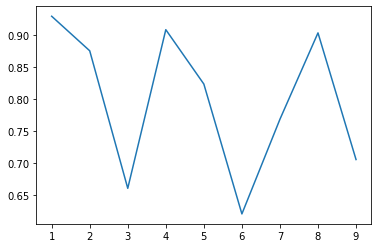

In [18]:
import matplotlib.pyplot as plt
terrapin = out[out['album_id'] == "2UnsSEdIma3DgCTUbAgQOV"]

plt.plot(terrapin['track_number'], terrapin['energy'])
plt.show()

In [ ]:
########### Running query

#There are no duplicated artists
genre_1 = many_artists(['cool%20jazz', 'brazilian%20jazz', 'latin%20jazz', 'jazz%20fusion', 'jazz', 'bebop', 'free%20jazz'])
genre_2 = many_artists(['mpb', 'pop', 'rock', 'pop%20rock', 'dance', 'nova%20mpb', 'electronic', 'blues', 'country'])
genre_3 = many_artists(['samba', 'maracatu', 'axe', 'forro', 'baiao', 'pagode', 'lambada', 'xote', 'reggaeton', 'reggae', 'funk', 'soul', 'black'])

all_artists = list(dict.fromkeys(genre_1 + genre_2 + genre_3))
all_artists = ['6ykfXAed2KOLOMI3R0TZdz', '7wBFjZMHsC6nfV0HOSd6uI', '6szvZFFvR9L526toDkoCvq', '1trBlPqDWSpAMq4gOY6eTV', '0H895uoamTDU0A9OH73CMT', '7v4qXHtzBIWgeVli2QwEJb', '7yMJSfFJgb2YFBAKSckG4z', '3pK0dKUyUeDAuZf0WLxmK7', '1ky3IPu9Q7xWEW7HzxptG7', '2SQs6NdLcEJMvRmsYP0q6Y', '77NtQtywQwkhjl5J4og75I', '2rtkDIrVv86Ihk38ojedRC', '6y5oKXca0lf8omWWFqgTjw', '5cpKvYFZXiVsN7FRLoNlm1', '7J4CY45Bnuxot372reu54a', '6KAxXqCUNr3O0rV6V4PeQp', '2GyanX5V0NmoRSMKWBI80W', '3w0iUnjFFyPgi2QW8sXxm1', '3cR4rhS2hBWqI7rJEBacvN', '2Kx7MNY7cI1ENniW7vT30N', '4QQgXkCYTt3BlENzhyNETg', '19eLuQmk9aCobbVDHc6eek', '5V0MlUE1Bft0mbLlND7FJz', '7nwUJBm0HE4ZxD3f5cy5ok', '49e4v89VmlDcFCMyDv9wQ9', '7G1GBhoKtEPnP86X2PvEYO', '0kbYTNQb4Pb1rPbbaF0pT4', '09hVIj6vWgoCDtT03h8ZCa', '25oLRSUjJk4YHNUsQXk7Ut', '0iOVhN3tnSvgDbcg25JoJb', '4gHcu2JoaXJ0mV4aNPCd7N', '2hGh5VOeeqimQFxqXvfCUf', '2jFZlvIea42ZvcCw4OeEdA', '1YzCsTRb22dQkh9lghPIrp', '7v4imS0moSyGdXyLgVTIV7', '2rspptKP0lPBdlJJAJHqht', '3rxeQlsv0Sc2nyYaZ5W71T', '0FMucZsEnCxs5pqBjHjIc8', '37J1PlAkhRK7yrZUtqaUpQ', '6I3M904Y9IwgDjrQ9pANiB', '4F7Q5NV6h5TSwCainz8S5A', '1eYhYunlNJlDoQhtYBvPsi', '6HCnsY0Rxi3cg53xreoAIm', '0cmWgDlu9CwTgxPhf403hb', '4N8BwYTEC6XqykGvXXlmfv', '4jXfFzeP66Zy67HM2mvIIF', '3Rq3YOF9YG9YfCWD4D56RZ', '7x5Slu7yTE5icZjNsc3OzW', '6sqZoZxe9BQwk7Zxh6STfF', '52lBOxCxbJg0ttXEW9CQpW', '4iVhFmG8YCCEHANGeUUS9q', '2lolQgalUvZDfp5vvVtTYV', '5z1VAFwT35EVvCp1XlZZuL', '7AC976RDJzL2asmZuz7qil', '25KNo5GDS6ZpLkjasaecA3', '3pO5VjZ4wOHCMBXOvbMISG', '65dGLGjkw3UbddUg2GKQoZ', '0EodhzA6yW1bIdD5B4tcmJ', '2ZvrvbQNrHKwjT7qfGFFUW', '5tTsrGPwQRWUsHR2Xf7Ke9', '32ogthv0BdaSMPml02X9YB', '05YVYeV4HxYp5rrWalvuE1', '179BpmLkQCRIoU68Co80f5', '7opp16lU7VM3l2WBdGMYHP', '29XOeO6KIWxGthejQqn793', '2weA6hhVqTIN2gSn9PUB9U', '0ldU0QJm31y0d6f57R1G2A', '5rX2c1zow6hCph8PnnU3kF', '4PDpGtF16XpqvXxsrFwQnN', '4iRZAbYvBqnxrbs6K25aJ7', '5Z1XZyEFY0dewG8faEIiEx', '6zkX5fhrSD4tdVOmimR9wB', '1pBuKaLHJlIlqYxQQaflve', '3VEG6gxFIMfl4Cdog26avS', '3kUKwTJdH8FuWzF8p6Dg9E', '03YhcM6fxypfwckPCQV8pQ', '7sBx432MZn1MzHeYHAA5qr', '5pMmqpG3HsoJ6EDDoXGXEr', '1bgyxtWjZwA5PQlDsvs9b8', '2vI9KFm0fwSfPrpEgOeIbq', '375zxMmh2cSgUzFFnva0O7', '4Ww5mwS7BWYjoZTUIrMHfC', '1W8TbFzNS15VwsempfY12H', '5olDKSsFhhmwh8UCWwKtpq', '5RzjqfPS0Bu4bUMkyNNDpn', '68l2i6GeNtwQlhKS59u5bu', '2JfVCMa3FlvQRlLT5uH9zb', '1VEzN9lxvG6KPR3QQGsebR', '71Ur25Abq58vksqJINpGdx', '3aM9H4QBnPUo6mnNVufAtN', '2EsmKkHsXK0WMNGOtIhbxr', '5v74mT11KGJqadf9sLw4dA', '6dUZplQfg5blo0h9HiJ94d', '3ZUZYvTkSr7kJQyAXVpqaL', '0ZqhrTXYPA9DZR527ZnFdO', '05E3NBxNMdnrPtxF9oraJm', '49zXTngyUTielHTbbH5YKs', '34W7ZCX0LZeJd8q6boKGOk', '3GpMtIOC5ZLvMBMI7IxPvA', '162DCkd8aDKwvjBb74Gu8b', '36YE6h8aN09ZKG4EhneDSf', '4DuZTASH5eSyd0K73W6fuZ', '5ZATfKurLqflrBhv2FLht5', '0DYWCXTkNqGFZIf67SrWEa', '5Pqc0ZFA20Y9zGJZ3ojUin', '6gc6oo3u2f7SqTd4mhe81O', '0JM134st8VY7Ld9T2wQiH0', '0BqALs1lInR9TTOulUADH7', '3NUsiT2JSyaWAnWaXxDzhQ', '77ZUbcdoU5KCPHNUl8bgQy', '7fAKtXSdNInWAIf0jVUz65', '0UOrkpzPED604dKzxgfJqg', '7HGNYPmbDrMkylWqeFCOIQ', '0yFvXd36g5sNKYDi0Kkvl8', '7oEkUINVIj1Nr3Wnj8tzqr', '0i1s9WcIu0PrUvHzALgofo', '5JYtpnUKxAzXfHEYpOeeit', '7rPqFVgJYARiFsLDlN6W6y', '0rSTXALHu0EKAawPLBdODH', '1b8kpp4DUwt1hWaxTiWQhD', '6uYrXgVHctAJtIdSODcyLJ', '5HlnN6xF2MD87KhGRmCRTd', '1sPg5EHuQXTMElpZ4iUgXe', '2OjoIDVPQKT9B7loZbPEfp', '4qKIiUdFND09cgGOc5kfoR', '5I0EPnV9gwrZYTbScjnaOk', '4iWkwAVzssjb8XgxdoOL6M', '57pVvBwa3ZCR9LsVlkLXj7', '0jOs0wnXCu1bGGP7kh5uIu', '17wDxPR2GcU3r1dpCoCiUi', '1C8UBSZs5rOPfxuxTMS6OI', '5rrmaoBXZ7Jcs4Qb77j0YA', '7dzq55YG3wjViqexDwiycQ', '6tOsSffQQIXmK8TqsDck8t', '3f5VCwd57gZsqMad28jyLV', '5jvQoouPSDvUEwynz5KPpv', '3Bnq7jiU506HcPjRgQ43TM', '2eFVsaX3yHLPeWpiqvmeFn', '5D56dZmhE9DgT01XixdHiD', '6tw6EpC9RgmSRZiZg0n22t', '64KVQ4YupSZYrGNLduVtj3', '50sftj2oW2iBviA6RkTzsz', '7n1XMwvxPf10t4OX6h6Ufy', '4C4kpaAdp6aKSkguw40SsU', '2ohBjgFT9V0LRDWO2wF9DJ', '3qZ2n5keOAat1SoF6bHwmb', '1tP3R35TdPW8BMwmTPOoVZ', '5C0gCCG8N5Dh5dZytIgzLX', '4laQz4PaKeh2Hu6QL6evVD', '7JoWcJHDOG58JYTe6d400S', '5re6NsyXzHg6uvNimzQ3F6', '3uCu2WgyG0Iw50ylOYDSpH', '57IX1XTNL4DPilyY5pQsaK', '177N2fB1WvNBCQ4epjMQ3O', '4HP9KltldfmkH2M2pQozzN', '3zhKxZr516VdNDa8v3oft2', '59FrDXDVJz0EKqYg39dnT2', '6rM2yY0GnVcOHMU5GD3y9E', '3TVXtAsR1Inumwj472S9r4', '1Xyo4u8uXC1ZmMpatF05PJ', '6LuN9FCkKOj5PcnpouEgny', '6qqNVTkY8uBg9cP3Jd7DAH', '1uNFoZAHBGtllmzznpCI3s', '0hCNtLu0JehylgoiP8L4Gh', '66CXWjxzNUsdJxJ2JdwvnR', '26VFTg2z8YR0cCuwLzESi2', '3Nrfpe0tUJi4K4DXYWgMUX', '31W5EY0aAly4Qieq6OFu6I', '55Aa2cqylxrFIXC767Z865', '6eUKZXaKkcviH0Ku9w2n3V', '5pKCCKE2ajJHZ9KAiaK11H', '5cj0lLjcoR7YOSnhnX0Po5', '6KImCVD70vtIoJWnq6nGn3', '181bsRPaVXVlUKXrxwZfHK', '7c0XG5cIJTrrAgEC3ULPiq', '2cFrymmkijnjDg9SS92EPM', '6vWDO969PvNqNYHIOW5v0m', '6l3HvQ5sa6mXTsMTB19rO5', '0du5cEVh5yTK9QJze8zA0C', '0VRj0yCOv2FXJNP47XQnx5', '4kYSro6naA4h99UJvo89HB', '2jku7tDXc6XoB6MO2hFuqg', '02kJSzxNuaWGqwubyUba0Z', '4nDoRrQiYLoBzwC5BhVJzF', '5LHRHt1k9lMyONurDHEdrp', '2wY79sveU1sp5g7SokKOiI', '0fA0VVWsXO9YnASrzqfmYu', '0C8ZW7ezQVs4URX5aX7Kqx', '4AK6F7OLvEQ5QYCBNiQWHq', '5Rl15oVamLq7FbSb0NNBNy', '5ZS223C6JyBfXasXxrRqOk', '137W8MRPWKqSmrBGDBFSop', '5JZ7CnR6gTvEMKX4g70Amv', '7n2wHs1TKAczGzO7Dd2rGr', '1i8SpTcr7yvPOmcqrbnVXY', '6fOMl44jA4Sp5b9PpYCkzz', '2h93pZq0e7k5yf4dywlkpM', '04gDigrS5kc9YWfZHwBETP', '4GvEc3ANtPPjt1ZJllr5Zl', '0cGUm45nv7Z6M6qdXYQGTX', '6S2OmqARrzebs0tKUEyXyp', '00FQb4jTyendYWaN8pK0wa', '4GNC7GD6oZMSxPGyXy4MNB', '1z7b1Pr1rSlvWRzsW3HOrS', '3MZsBdqDrRTJihTHQrO6Dq', '20JZFwl6HVl6yg8a4H3ZqK', '0YinUQ50QDB7ZxSCLyQ40k', '1anyVhU62p31KFi8MEzkbf', '3WrFJ7ztbogyGnTHbHJFl2', '3YQKmKGau1PzlVlkL1iodx', '53XhwfbYqKCa1cC15pYq2q', '1dfeR4HaWDbWqFHLkxsg1d', '3b8QkneNDz4JHKKKlLgYZg', '08GQAI4eElDnROBrJRGE0X', '6x2LnllRG5uGarZMsD4iO8', '36QJpDe2go2KgaRleHCDTp', '3PhoLpVuITZKcymswpck5b', '0hEurMDQu99nJRq8pTxO14', '0L8ExT028jH3ddEcZwqJJ5', '4UXqAaa6dQYAk18Lv7PEgX', '0k17h0D3J5VfsdmQ1iZtE9', '22bE4uQ6baNwSHPVcDxLCe', '711MCceyCBcFnzjGY4Q7Un', '3mIj9lX2MWuHmhNCA7LSCW', '5Pwc4xIPtQLFEnJriah9YJ', '0epOFNiUfyON9EYx7Tpr6V', '6zFYqv1mOsgBRQbae3JJ9e', '6s22t5Y3prQHyaHWUN1R1C', '2ye2Wgw4gimLv2eAKyk1NB', '7gOdHgIoIKoe4i9Tta6qdD', '2IvkS5MXK0vPGnwyJsrEyV', '0ECwFtbIWEVNwjlrfc6xoL', '7oPftvlwr6VrsViSDV7fJY', '6olE6TJLqED3rqDCT0FyPh', '26T3LtbuGT1Fu9m0eRq5X3', '6yJCxee7QumYr820xdIsjo', '3IYUhFvPQItj6xySrBmZkd', '0oSGxfWSnnOXhD2fKuz2Gy', '16oZKvXb6WkQlVAjwo2Wbg', '4MoAOfV4ROWofLG3a3hhBN', '6ZLTlhejhndI4Rh53vYhrY', '3jOstUTkEu2JkjvRdBA5Gu', '7EQ0qTo7fWT7DPxmxtSYEc', '0C0XlULifJtAgn6ZNCW2eu', '7FBcuc1gsnv6Y1nwFtNRCb', '0rvjqX7ttXeg3mTy8Xscbt', '7Ln80lUS6He07XvHI8qqHH', '3NPpFNZtSTHheNBaWC82rB', '4TMHGUX5WI7OOm53PqSDAT', '0NIPkIjTV8mB795yEIiPYL', '4MVyzYMgTwdP7Z49wAZHx0', '77SW9BnxLY8rJ0RciFqkHh', '4Z8W4fKeB5YxbusRsdQVPb', '5Zq7R5qmi58ByYyBQTlNuk', '44NX2ffIYHr6D4n7RaZF7A', '7Ey4PD4MYsKc5I2dolUwbH', '13ubrt8QOOCPljQ2FL1Kca', '21WS9wngs9AqFckK7yYJPM', '28ExwzUQsvgJooOI0X1mr3', '7k73EtZwoPs516ZxE72KsO', '48AVv3cw03WdSB5b4qmNCr', '0pPN4tp51uXAhkDux1Mmn4', '0T5OJgMVjKIX3b3W3ekqOl', '4pzAvicKWenQtv9zIQim47', '1NU9Em6e8dDo36Js6nEo3t', '7zMVPOJPs5jgU8NorRxqJe', '09mvgMBvJkxarNIDGdwPWg', '2CBvbVxhd3ZJXRTCl88H7E', '3Uqc6c1DUPkyUQSeatexYU', '4hozqATxbpy9TwKWRT8QVO', '6BaEtrOzEuvmxmHZRR1nNa', '1SwYzkVWDvzFbLblUN4snA', '6eCgsu961ClH7K6NSsXaBh', '4XU1w0lxvHVRYKFQbMOTss', '13NBINjChpGTx6AXEZ73O7', '4eBRIkqBA2GyYKzLvXD9a4', '0coxNVD2J4X4rHxJ6FdmLX', '0xmGtVZjRriA2TVM9oaM61', '1XsE995nQlRygtN1vcT5vm', '2dLzeuFyFPAYdWKU3UuYTA', '328azApStz6rBvBKZsUwvi', '7DYKtStEy5mAmAZvEobbgo', '3k7qB8d47YeYcHlrqaLM4U', '75qgh9OR0cQqBGvpeONEbP', '58zHLr1IOAaAHCo0ZTd5v9', '3zkqzEu0nHPDeP93vvY49U', '79yGLYvB762fzc956hwpza', '7J4lqW9BfG8FjylK9SP59j', '0NEIgcRGtND3sKQy2PQUmO', '72Ou9x8pYhV6nEKB8t6PS7', '4yjDetBvx6US1EigHTiOLK', '2eeS42p99dZLO1AJtCIqNB', '0YhNnFt3UUMmDn2b36chch', '2r74H2L0vUNEGoa8O1FkcF', '1TbJBNeI0tPHOJ50dX1pms', '2OfV1qJIySAFV6RyLn8Zu0', '28ZDQf2XF8nAaPotggxfiS', '7uVnagngxkjgWmZVmQDqV1', '6ggxZsustPrQYf9UcNaI3E', '51AJIhfy10DEwyyqU2YhrG', '2A9Ed9zQfvv9Ns78PDEagE', '6Pb2LWiell2ucEkb44xS7s', '0oQwW3ThplFLurHGHceuP9', '2GVbQOFXf45Nw79h3WdAuq', '3Xlz4Dcc56zv8iTLFaTCo2', '4TXZmg1864X8lT1wXDKMj7', '7bXgB6jMjp9ATFy66eO08Z', '06HL4z0CvFAxyc27GXpf02', '6M2wZ9GZgrQXHCFfjv46we', '1HY2Jd0NmPuamShAr6KMms', '0ZED1XzwlLHW4ZaG4lOT6m', '31TPClRtHm23RisEBtV3X7', '7CajNmpbOovFoOoasH2HaY', '360IAlyVv4PCEVjgyMZrxK', '6jJ0s89eD6GaHleKKya26X', '5WUlDfRSoLAfcVSX1WnrxN', '23zg3TcAtWQy7J6upgbUnj', '3KV3p5EY4AvKxOlhGHORLg', '1Hsdzj7Dlq2I7tHP7501T4', '64M6ah0SkkRsnPGtGiRAbb', '3aQeKQSyrW4qWr35idm0cy', '5YGY8feqx7naU7z4HrwZM6', '0TnOYISbd1XYRBk9myaseg', '2kRfqPViCqYdSGhYSM9R0Q', '1Cs0zKBU1kc0i8ypK3B9ai', '6LqNN22kT3074XbTVUrhzX', '1KCSPY1glIKqW2TotWuXOR', '2iojnBLj0qIMiKPvVhLnsH', '0z4gvV4rjIZ9wHck67ucSV', '2wUjUUtkb5lvLKcGKsKqsR', '55fhWPvDiMpLnE4ZzNXZyW', '6nS5roXSAGhTGr34W6n7Et', '0X2BH1fck6amBIoJhDVmmJ', '0EmeFodog0BfCgMzAIvKQp', '1cZQSpDsxgKIX2yW5OR9Ot', '1vCWHaC5f2uS3yhpwWbIA6', '163tK9Wjr9P9DmM0AVK7lm', '5p7f24Rk5HkUZsaS3BLG5F', '4npEfmQ6YuiwW1GpUmaq3F', '1QRj3hoop9Mv5VvHQkwPEp', '1yxSLGMDHlW21z4YXirZDS', '540vIaP2JwjQb9dm3aArA4', '3SKTkAUNa3oUa2rkd8DAyM', '20DZAfCuP1TKZl5KcY7z3Q', '6fcTRFpz0yH79qSKfof7lp', '5eIbEEQnDM8yuDVB0bimSP', '5FKchcZpQOkqFvXBj1aCvb', '76M2Ekj8bG8W7X2nbx2CpF', '0jNDKefhfSbLR9sFvcPLHo', '57dN52uHvrHOxijzpIgu3E', '67qogtRNI0GjUr8PlaG6Zh', '0X380XXQSNBYuleKzav5UO', '2CIMQHirSU0MQqyYHq0eOx', '1JPy5PsJtkhftfdr6saN2i', '3OsRAKCvk37zwYcnzRf5XF', '5oOhM2DFWab8XhSdQiITry', '7o7mC95EDbJKTcPAAs8C3r', '5R3Hr2cnCCjt220Jmt2xLf', '13ab1LgQZ3tQOhkDRRYB8Y', '62vbsDRAq0qHdezaCOzB0T', '4aKdmOXdUKX07HVd3sGgzw', '47z7ZrgFoBvVpCnElCE3Zh', '066X20Nz7iquqkkCW6Jxy6', '4ehtJnVumNf6xzSCDk8aLB', '7muzHifhMdnfN1xncRLOqk', '0Y0QSi6lz1bPik5Ffjr8sd', '5vQfv3s2Z2SRdPZKr82ABw', '72iCiKwu6nu6Qq9emIwzYv', '7yPPzu5UdAK7yagQqjEZQm', '7lZauDnRoAC3kmaYae2opv', '6kBDZFXuLrZgHnvmPu9NsG', '0tvpihdAsKiNnP6sWS3jUI', '6Tyzp9KzpiZ04DABQoedps', '11gWrKZMBsGQWmobv3oNfW', '3TaUSUXn41GixL7zbvrIDt', '0u18Cq5stIQLUoIaULzDmA', '41rVuRHYAiH7ltBTHVR9We', '3QryVD03gGZOLQQXjy3EoA', '4AA8eXtzqh5ykxtafLaPOi', '5gqhueRUZEa7VDnQt4HODp', '4YLQaW1UU3mrVetC8gNkg5', '5CE2IfdYZEQGIDsfiRm8SI', '24neLwyYRyj4ItaGnFeIT0', '5ttgIeUVka6FLyi00Uu5h8', '7zrkALJ9ayRjzysp4QYoEg', '7Eu1txygG6nJttLHbZdQOh', '2LZDXcxJWgsJfKXZv9a5eG', '3NJ94iuAmmMjbszODYT6pO', '7K3zpFXBvPcvzhj7zlGJdO', '3qnGvpP8Yth1AqSBMqON5x', '7mnBLXK823vNxN3UWB7Gfz', '776Uo845nYHJpNaStv1Ds4', '4F84IBURUo98rz4r61KF70', '6PAt558ZEZl0DmdXlnjMgD', '4wQ3PyMz3WwJGI5uEqHUVR', '6GI52t8N5F02MxU0g5U69P', '485uL27bPomh29R4JmQehQ', '60df5JBRRPcnSpsIMxxwQm', '6QtGlUje9TIkLrgPZrESuk', '2AM4ilv6UzW0uMRuqKtDgN', '5fsDcuclIe8ZiBD5P787K1', '39T6qqI0jDtSWWioX8eGJz', '5xUf6j4upBrXZPg6AI4MRK', '5wbIWUzTPuTxTyG6ouQKqz', '0WwSkZ7LtFUFjGjMZBMt6T', '4NpFxQe2UvRCAjto3JqlSl', '3dkbV4qihUeMsqN4vBGg93', '01aC2ikO4Xgb2LUpf9JfKp', '4pejUc4iciQfgdX6OKulQn', '00tVTdpEhQQw1bqdu8RCx2', '16GcWuvvybAoaHr0NqT8Eh', '4vpDg7Y7fU982Ds30zawDA', '5AEG63ajney2BoDXi0Vb84', '6FxuPrpa8phaP3Xn73emhT', '4NgfOZCL9Ml67xzM0xzIvC', '3UbyYnvNIT5DFXU4WgiGpP', '1CYsQCypByMVgnv17qsSbQ', '6biWAmrHyiMkX49LkycGqQ', '74oJ4qxwOZvX6oSsu1DGnw', '5xLSa7l4IV1gsQfhAMvl0U', '70TsVY28EcEUYSGG5Yw7mp', '1riHqX633Kup3mJAw8WR8p', '5sD1ZLf2dGQ9gQ3YJl1eAd', '2pdvghEHZJtgSXZ7cvNLou', '7LIy7KinYq7a83dUH6kvxT', '3QDaXfnxfQqqJQK5lSdjLN', '2rc78XDH9zuJP6bm78lU8Z', '5krkohEVJYw0qoB5VWwxaC', '59QxeZBL6k9L4oJBGSyukd', '54SHZF2YS3W87xuJKSvOVf', '718COspgdWOnwOFpJHRZHS', '4oUHIQIBe0LHzYfvXNW4QM', '3oSJ7TBVCWMDMiYjXNiCKE', '3FfvYsEGaIb52QPXhg4DcH', '3grHWM9bx2E9vwJCdlRv9O', '0BvkDsjIUla7X0k6CSWh1I', '2kucQ9jQwuD8jWdtR9Ef38', '7z5WFjZAIYejWy0NI5lv4T', '1UTPBmNbXNTittyMJrNkvw', '6WY7D3jk8zTrHtmkqqo5GI', '5vngPClqofybhPERIqQMYd', '70kkdajctXSbqSMJbQO424', '6roFdX1y5BYSbp60OTJWMd', '0u2FHSq3ln94y5Q57xazwf', '2pSObt5Fk8izuX8ZfI3jRn', '4YLtscXsxbVgi031ovDDdh', '6y8XlgIV8BLlIg1tT1R10i', '4xFUf1FHVy696Q1JQZMTRj', '6kACVPfCOnqzgfEF5ryl0x', '13ZEDW6vyBF12HYcZRr4EV', '0XKOBt59crntr7HQXXO8Yz', '1v3tdpIdBSW14rHUfiEVOv', '0fiWOxhsBsQQvFDtxUQWo0', '3RqBeV12Tt7A8xH3zBDDUF', '4mxWe1mtYIYfP040G38yvS', '1dID9zgn0OV0Y8ud7Mh2tS', '66lH4jAE7pqPlOlzUKbwA0', '4BYxqVkZyFjtik7crYLg5Q', '0a1gHP0HAqALbEyxaD5Ngn', '7x8nK0m0cP2ksQf0mjWdPS', '7jVv8c5Fj3E9VhNjxT4snq', '6zLBxLdl60ekBLpawtT63I', '5q8HGNo0BjLWaTAhRtbwxa', '5W5bDNCqJ1jbCgTxDD0Cb3', '2bA6fzP0lMAQ4kz6CF61w8', '32WkQRZEVKSzVAAYqukAEA', '1n2pb9Tsfe4SwAjmUac6YT', '32vWCbZh0xZ4o9gkz4PsEU', '6pBNfggcZZDCmb0p92OnGn', '1By9QBFnjZAoI83BZppHlt', '25IG9fa7cbdmCIy3OnuH57', '1E2AEtxaFaJtH0lO7kgNKw', '77kULmXAQ6vWer7IIHdGzI', '2v7wIbCkIzxOfT3GnqCexD', '65c5si0ePAwkOCn4M35Ho7', '7yQrcdkLdBAkV7yY9fF2Hw', '56TkPi7rpmU8jTpkcK7FY3', '57xRtfFlssbpntpRQOBodd', '6cHQUDAPGKRE2NbVjBlOcz', '0hPar6ePAELiu9rYMdvMEo', '096an3uS6ZaK2XySae6SqP', '0VSgciOd32tP2Yna1w4vDr', '0RSWHhBUwW7lhCqXqxKxWN', '1WkZvxuA4zCcFF9GChK6Vr', '0t2xdTxRXnffsmpMamH8Ls', '1mZbRiSVb2ExneAlDbBiiT', '64neTfIIdYKNhJ9zxoz3jF', '24ZP6P1JgCo65CEJsk2OQ2', '2cAooeeHKk2UvzUgIxpS0y', '4vKCAkbdulcqatglgbi5CG', '5j3htXVskZF0u8qWY5zcF8', '7LunbFWIm3RPQpywjOSSd8', '1gIa65d5ICT2xVWiUJ3u27', '3tJ9PkBOrG7hFkHeNM2tbw', '1rd51IrbtX9DqoU0Zxu4TV', '0YGO4mXO3cnznUUbhbOyUl', '4EUuQxMNowMUEs5gu4BzBX', '65TbyndeGrDlFd4IkZNfbN', '3DF0ClNOUuvS3gh8V8sRJH', '2krrkKvM52JgvfGu2Uewbg', '6UKz2oYWzE0ZBnciztCown', '7vTlV3ajnMxl5l0ahupUeP', '1wqkMc837HWUwdC8sOZ7lZ', '0Rrl4hJQjRAbGtiEwAqS5N', '1sDVuztNhGcetCLChkleDA', '7KVJCU4z5L4EUHILL8aMxR', '1RnHJ07H3jcpay9PrUPjnt', '7hLjkyL9Pz9xtQNahzJZki', '0qHOVLCmMmMgk9l3GsgmUB', '6VPRGmbZ0dupZrbwwEDRRw', '2B8HcBRTizIsSPryM46Sb1', '2HtEBtekn0bXogyogD3PTr', '08yxJfM5RnFAjJvMJIFnvh', '20L3gYREq24KddkFreyiNv', '2poCUrtJvVVgfA2hgri1IS', '4mnhyGRAuExTL4J0soT4za', '6uTK3YD9CT3pLx2yEfVmXk', '3o1Lr9yRGJJhhLlVQFObfC', '4cx31cxKTg5L8blZE24qfZ', '60iOwdF3A0p4pAwgUXMaWU', '4ph6Bt1mkDlmf32PSvRa8A', '2dn7slANEuZTGyraHIhEg0', '1bhqpMFFgoa0NTz82BprgL', '3V7U1x0TRBn7spzHDQiZhi', '6Kps94g1Npexh3LrinIOvC', '0l82Lk1LX5X2qqYuPSXTuf', '4Mw0vJsDXTZF7kn7EsdNoD', '2v5eqze59fqRes2e5QVGhf', '6NqIUh0cpaygBWUUAjBaog', '78oxdhJ0pr4Dkyk0paWUAf', '6YMWV5AeYoZymMMDonMfsA', '7yl05GUXqcUA3mfpowr1fe', '6XgJ4LQHTOtveWKH5V7X56', '4avp60HMZY8XgYe7VGi4SU', '5NuT1t9QLRpJunogXp0Khd', '7iJl63aJyNd8C6NZlMv6kp', '1Da4NyNC4CLayaNGGmL9uZ', '2qXtddeMnGLeLuIfhnJY3P', '2zUi8eGWcojkvBwCysFOyC', '3RpJ23sQA3B70ZgSnT2Vxr', '4EU2koSlyxLmiyslykCis5', '5Rxz1EE4Jj08mu40vlrqHv', '6cUxFmglW7PeSS5dKaWOtP', '1AL2GKpmRrKXkYIcASuRFa', '43DRDu6nLSeIedZ7T1A616', '559vxOLTzlAv0zB77JMcdG', '35YkpX0zYwHG8vOIhObvxP', '3OxZ4asD88P1lJJmLcXz4K', '22jNvLBrXGKr4CcV2tw8Ag', '7lOUbhzQ1F3xcCMEcTtbO5', '4B0rppbJilYfZOPPEgpPtz', '4KDxYlnGZEiS60pAnfZf4W', '6DqFCzjARUV3xH9meu3Bya', '3WQ1s2QFvL6crxBvrVhwzj','5K8Rmjmf4RZFffz94EmBRt', '3vlUveVfzPXzhiPGjHHxOH', '2JnNhPT0sQvhKOyLqDKRuP', '4cn4gMq0KXORHeYA45PcBi', '2j5unrF80yCu3AF8MPE2VE', '6LjdKBMnP1Da8Oe6WhrN56', '2ZofT7n9AlTKf7KDCoHGgD', '5COT5dVPZHSd0ZFyCQCm7s', '1mCHLu4gizrN9PwHxKrJv4', '62XT0ctjHC56OxRMdawQZM', '3mwORnkU8O0wdR9tXgcpmW', '58BvoBOFsIAD3eIVUhxZzB', '3TE6ZGjhmTVpLZrn9hvfBX', '33FPCDgVDKFBFkWq7BMUaA', '0Pn49e9KBqcekfXpSAGgAM', '7j9RR5J2F5v6m8EboGD8hX', '09Yv3hmY67Sfm7EnSIRdJ9', '0HZ7oF5qz4WsSW1tcP1Ree', '0PzfPF8ENH2nQBZkiO7xx6', '0cDZ1YAlkkIn0Z7BjiEUj1', '0f8xcEC0NjwIHbsSzemHzF', '1BtDBueZEfkbCSgL3KOpV6', '1JtGJYC3rfEpLD9UE5iv8Y', '1hzcofFBeTsDMBQyXGepl7', '2Gb5xgToph2j0LB12961jV', '2PxwT4nOdayfCTWKxJITgf', '2at3iGybjf8RTISZlRzpKq', '2m8rcwvgIOeTNqNoX8Dkxg', '3qi0M6Kvjjfg38DSFLt67n', '3wCJWaZeae5jK8C9Tl02Tg', '43NW58JBrjnoOMwnfVfdcF', '49q5zQFVXCAYLyfKL76gWV', '51550L9Dw4UuhXrdgAPCMa', '56GvMdrnvmFGOh6mDUKs4w', '5UvcwtHxlNS09gtWY57lHu', '5dQ7wkescVcvcyAkkJpoGa', '5tnXVyKySs6fnLQZ4PYJQt', '66xN3Pbq6UF7n9ula6quUR', '6A21nTkZg5tOFDkIrbgnwZ', '6GzGO4G962Ov9OneTAXJsi', '6LbLjAMGVIlsCZrl2zEdRp', '6cmyz1fzHqfIqHxrofeawv', '6rvTO9TDkjT0sW7tWRpe3P', '6wepFbzFEmYMUWJz3d8gjo', '7GYMYICWXJp8wo0vXHiGns', '7ryYg2lTOMeGRmZpCL3F7L', '2F2P0ffhtXQWZAHVaqwJXQ', '2r2NwB44OwFzHcTN5Y0vrj', '33pzd98GTogONs4ZUlCbUc', '3IpWn2pfVoVtbiuF0X5Oo9', '3iQhIAZntTmgKcEnocGV7M', '6mPswHpL1PqahOi0u1sHt5', '0c2j2j6ywKLZW8iYJ7OVcb', '3qJdG6SsmahzrMPhH4lM4Y', '4OiaMvpoAak5TZg249GabE', '7FNnA9vBm6EKceENgCGRMb', '3CDoRporvSjdzTrm99a3gi', '4NUePmzDvCYqilXBFa91Hg', '5ZfBThYiIIhL7jHMG8gDB2', '1vppDmG3i5sXf3DJzrK4T1', '4dyYjqmYDjegbB3F2mbvcT', '1fUSLFr4WUBx7joEcGwpvG', '5JG9GISYjRLQUJMH2C6iJ5', '6gEzJZrbm0F4ihvE9iXR9z', '1vp5pm1DluN0sNXx4tMZzo', '0NsJZ5PMjqghGDuMzY7CuT', '0ciLF0bOuu2BhqzCEZgHoB', '3h7RaVXBvdSNa7LXQtVYqH', '11iQCRz636WFdHj42qxAF6', '6vTqEFbTtTRJsuIpzZgjxi', '5exy2LREZrJ6aRzj1SwXQX', '34dfPo3Zi55yM6oV46q4y7', '4q3ewBCX7sLwd24euuV69X', '1vyhD5VmyZ7KMfW5gqLgo5', '2R21vXR83lH98kGeO99Y66', '4VMYDCV2IEDYJArk749S6m', '329e4yvIujISKGKz1BZZbO', '77ziqFxp5gaInVrF2lj4ht', '1SupJlEpv7RS2tPNRaHViT', '1r4hJ1h58CWwUQe3MxPuau', '790FomKkXshlbRYZFtlgla', '4SsVbpTthjScTS7U2hmr1X', '12vb80Km0Ew53ABfJOepVz', '1TtXnWcUs0FCkaZDPGYHdf', '1pQWsZQehhS4wavwh7Fnxd', '14zUHaJZo1mnYtn6IBRaRP', '47MpMsUfWtgyIIBEFOr4FE', '1GDbiv3spRmZ1XdM1jQbT7', '4obzFoKoKRHIphyHzJ35G3', '4IMAo2UQchVFyPH24PAjUs', '0GM7qgcRCORpGnfcN2tCiB', '3E6xrwgnVfYCrCs0ePERDz', '0tmwSHipWxN12fsoLcFU3B', '21451j1KhjAiaYKflxBjr1', '00XhexlJEXQstHimpZN910', '07YUOmWljBTXwIseAUd9TW', '2oQX8QiMXOyuqbcZEFsZfm', '2LRoIwlKmHjgvigdNGBHNo', '0EFisYRi20PTADoJrifHrz', '6w9ToX5slZ4uIdmD17hJ3c', '3MHaV05u0io8fQbZ2XPtlC', '1fctva4kpRbg2k3v7kwRuS', '1wZtkThiXbVNtj6hee6dz9', '64aJYyrXljOodnUG6jvhRD', '3fZk3Gm5dN5v5yfYMQ04Bx', '2T1aUibqR2QC2sINIDQOAK', '37230BxxYs9ksS7OkZw3IU', '33ScadVnbm2X8kkUqOkC6Z', '0eHQ9o50hj6ZDNBt6Ys1sD', '1pf0MPKfKdvS8J779mS1Ay', '3RtNN1VnooWEn3KQk03DUL', '2DspEsT7UXGKd2VaaedgG4', '3EiLUeyEcA6fbRPSHkG5kb', '1fux65HMCBvfJHqlBc4Nno', '1Ts9of7VPZElwPQnqnDSfW', '5hdhHgpxyniooUiQVaPxQ0', '5bWUlnPx9OYKsLiUJrhCA1', '11YLRSsZA3YVuQQtHXKTlz', '0eecdvMrqBftK0M1VKhaF4', '1pgDilWYDWLoOgGjf1iHNu', '4bw2Am3p9ji3mYsXNXtQcd', '2QsynagSdAqZj3U9HgDzjD', '0EdvGhlC1FkGItLOWQzG4J', '6GkJh85o22LfD2vgL9DP6f', '2WjvvwAX0mdWwq3aFuUdtc', '6MxlVTY6PmY8Nyn16fvxtb', '5SXEylV07TC57eanSxxg4R', '7dGJo4pcD2V6oG8kP0tJRR', '7hJcb9fa4alzcOq3EaNPoG', '1ZwdS5xdxEREPySFridCfh', '6DPYiyq5kWVQS4RGwxzPC7', '5a2EaR3hamoenG9rDuVn8j', '7guDJrEfX3qb6FEbdPA5qi', '1Oa0bMld0A3u5OTYfMzp5h', '1ThoqLcyIYvZn7iWbj8fsj', '3koiLjNrgRTNbOwViDipeA', '3RNrq3jvMZxD9ZyoOZbQOD', '3YcBF2ttyueytpXtEzn1Za', '3Mcii5XWf6E0lrY3Uky4cA', '2mVVjNmdjXZZDvhgQWiakk', '2d0hyoQ5ynDBnkvAbJKORj', '6MDME20pz9RveH9rEXvrOM', '3RwQ26hR2tJtA8F9p2n7jG', '41Q0HrwWBtuUkJc7C1Rp6K', '2x9SpqnPi8rlE9pjHBwmSC', '165ZgPlLkK7bf5bDoFc6Sb', '7IfculRW2WXyzNQ8djX8WX', '5LhTec3c7dcqBvpLRWbMcf', '7pXu47GoqSYRajmBCjxdD6', '4WN5naL3ofxrVBgFpguzKo', '53QzNeFpzAaXYnrDBbDrIp', '77DAFfvm3O9zT5dIoG0eIO', '02seUFsFQP7TH4hLrTj77o', '7GaxyUddsPok8BuhxN6OUW', '30FDJPN3RtwJZ20g5YGCRX', '7B4hKK0S9QYnaoqa9OuwgX', '6twIAGnYuIT1pncMAsXnEm', '2B4ZHz4QDWJTXPFPgO5peE', '19y5MFBH7gohEdGwKM7QsP', '336vr2M3Va0FjyvB55lJEd', '57bUPid8xztkieZfS7OlEV', '6NyJIFHAePjHR1pFxwisqz', '3VNITwohbvU5Wuy5PC6dsI', '0FrpdcVlJQqibaz5HfBUrL', '64mPnRMMeudAet0E62ypkx', '4mLJ3XfOM5FPjSAWdQ2Jk7', '2GVBp7QyHckoOg7rYkLvrA', '0bzfPKdbXL5ezYW2z3UGQj', '4uN3DsfENc7dp0OLO0FEIb', '5m8H6zSadhu1j9Yi04VLqD', '5K0rbdBrs2tNXe5LeWMATT', '2r09Inibex3C4ZNTUVSG3m', '4ETSs924pXMzjIeD6E9b4u', '3fMbdgg4jU18AjLCKBhRSm', '5y2Xq6xcjJb2jVM54GHK3t', '4dpARuHxo51G3z768sgnrY', '3DiDSECUqqY1AuBP8qtaIa', '1vaQ6v3pOFxAIrFoPrAcom', '6Q192DXotxtaysaqNPy5yR', '4frXpPxQQZwbCu3eTGnZEw', '7e1ICztHM2Sc4JNLxeMXYl', '4fxd5Ee7UefO4CUXgwJ7IP', '1W7FNibLa0O0b572tB2w7t', '1XkoF8ryArs86LZvFOkbyr', '1A9o3Ljt67pFZ89YtPPL5X', '1uiEZYehlNivdK3iQyAbye', '3ycxRkcZ67ALN3GQJ57Vig', '53KwLdlmrlCelAZMaLVZqU', '6qgnBH6iDM91ipVXv28OMu', '7mDU6nMUJnOSY2Hkjz5oqM', '3QTDHixorJelOLxoxcjqGx', '6hnWRPzGGKiapVX1UCdEAC', '47zz7sob9NUcODy0BTDvKx', '0vqJkZ0RpLZixt3lTmD8vP', '4hz8tIajF2INpgM0qzPJz2', '4ClziihVpBeFXNyDH83Lde', '4HzKw8XcD0piJmDrrPRCYk', '1vfezMIyCr4XUdYRaKIKi3', '2Mu5NfyYm8n5iTomuKAEHl', '0NcPKaSNIHAM2RfioH9vMT', '5FxD8fkQZ6KcsSYupDVoSO', '2FwDTncULUnmANIh7qKa5z', '07d5etnpjriczFBB8pxmRe', '4isewEHTP7Az2QheDdBQ6J', '4ULO7IGI3M2bo0Ap7B9h8a', '0JOxt5QOwq0czoJxvSc5hS', '3rHl3rSgCnHhOlVB87ZxyF', '4GIqbOr0FgE9qmJ31kVYdD', '1MK0sGeyTNkbefYGj673e9', '0NTSMFFapnyZfvmCwzcYPd', '2CWWgbxApjbyByxBBCvGTm', '1Zq8pfBl4ejCMrWdeAdphc', '36eSjIksD6fehqxyDUHDA3', '23MPAWNQLgjmhquLiZ6tWg', '6e8ISIsI7UQZPyEorefAhK', '3544ImlskUwZqWJTmqWUsa', '0FRKTwQSToXpCxYMhyUzYY', '7L6u6TyhjuwubrcojPeNgf', '4XpPveeg7RuYS3CgLo75t9', '0dR10i73opHXuRuLbgxltM', '0d5ZwMtCer8dQdOPAgWhe7', '6rBvjnvdsRxFRSrq1StGOM', '2s5DSt9VBNzAn2TbtDHzFZ', '5fwaejlOHVBAw1KhIPPaQe', '7FhkwcO8Jd7BRWdllBpXBJ', '0zokIKbH4c7crvZP9Xel1Y', '7kWnE981vITXDnAD2cZmCV', '6agfg4xMnwe2te96GmEUz4', '35jmO5o3AhUV70kiR7u4Nw', '2K3GorTixXKAiwe2t9lO89', '6bYFkBNvayh3nGqxcPp7Sv', '0VE0GTaTSeeGSzrQpLmeb9', '3Meu28o8P5z9Zjm6NTGihT', '2mVTkiwfm4ic6DnHpmFq8K', '0T5lL70aSt7pkO6jjWF1XE', '6bw2w1Dfi7Dzv5tX42PmDc', '5EHvXKnNz78jkAVgTQLQ5O', '3yoMYmOERl3KOV9xjqwhv5', '3Bv5btxNbwbt79fcjw9DAg', '213mmq3zkNWx7CtfzftTC5', '7vrrJ5YlL3I8XUrh1ktGJV', '4ZISAmHmQUDCpv8xydqeKG', '6qpmcQfxhmNxNMCJUrpHwe', '5ctFffJBdJe8PZL7W7NeML', '221Rd0FvVxMx7eCbWqjiKd', '504DdVupqJJUEkzmHzJEfs', '6SYbLA9utoNsllunR1TnkM', '6jPWrSmxOd9mj7Xaj4EP2Y', '0WVXlaglIOtQueNbucPjZ0', '24dCDrr94SNSAREMJhBHCs', '3XFQRe2FsSOjrODygK4caW', '1Dt7cfRzxM8qPVa82jX9y5', '2j9o2nPQjfuSyGgeqAn6q4', '04D6nPuCycr1pfTwXXqmDH', '15LsRgSmN0t8VLcsUFYW5J', '0yccWzWOIxvYVmZaRQkSg5']

for i in range(1, len(all_artists)):
    oi = describing_tracks(all_artists[i])
    print('Terminei um artista, agora imprimindo...')
    if type(oi) != dict:
        oi.to_csv(f'C:/Users/Lenovo/Documents/GitHub/music_order/deep/raw/{i}.csv') # many subgenres, many artists, one album per artist
        print(f'===>> Imprimi artista número {i}')
    else:
        print('Ixi, esse veio vazio... Tentando próximo')